In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
print(cv2.__version__)

4.11.0


In [6]:
import matplotlib.pyplot as plt

In [5]:
image=cv2.imread(r"jadeja.jpg")
                 

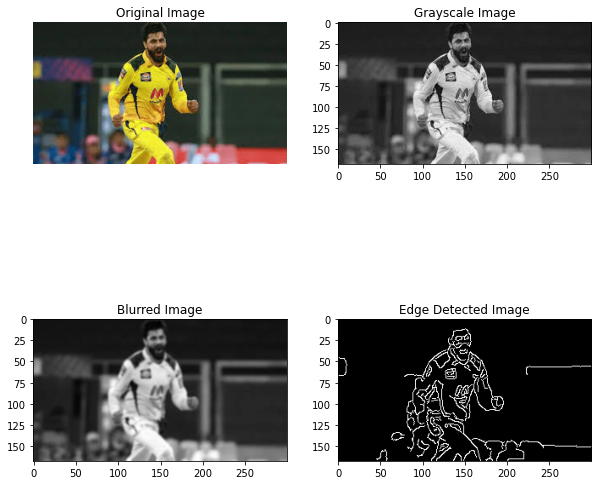

In [6]:
if image is None:
    print("error: Image not found!")
else:
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(image_rgb)
    axs[0, 0].set_title("Original Image")
    axs[0, 1].imshow(gray, cmap="gray")
    axs[0, 1].set_title("Grayscale Image")

    axs[1, 0].imshow(blurred, cmap="gray")
    axs[1, 0].set_title("Blurred Image")

    axs[1, 1].imshow(edges, cmap="gray")
    axs[1, 1].set_title("Edge Detected Image")
for ax in axs.flat:
    ax.axis("off")
    plt.show()

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

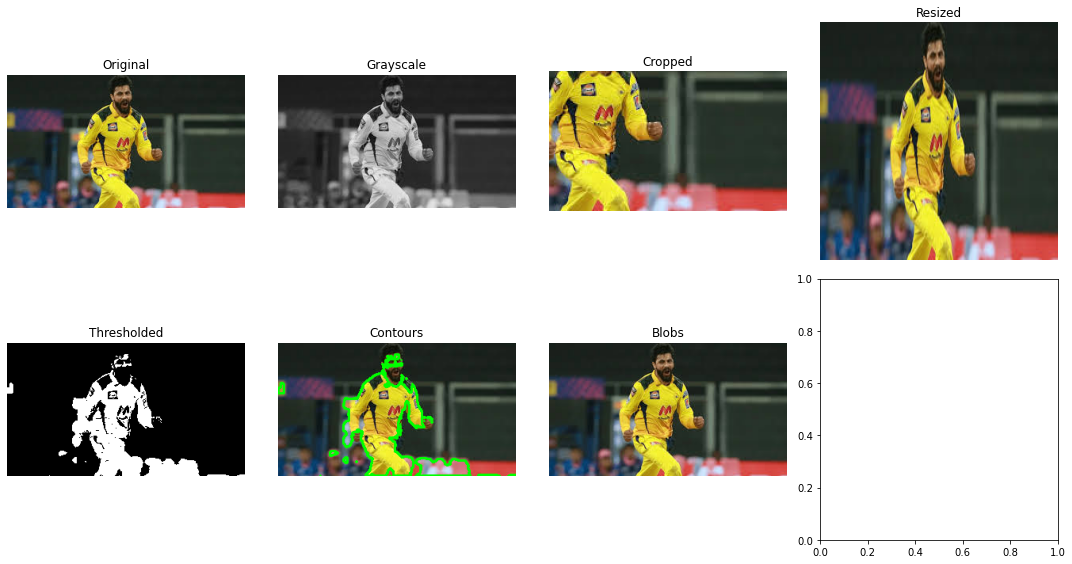

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("jadeja.jpg")
if image is None:
    print("Error: Image not found!")
    exit()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = image[50:300, 100:400]
resized = cv2.resize(image, (300, 300))
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresholded)
blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
titles = ["Original", "Grayscale", "Cropped", "Resized", "Thresholded", "Contours", "Blobs"]
images = [image, gray, cropped, resized, thresholded, contour_image, blob_image]
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flat[:7]):
    cmap = "gray" if len(images[i].shape) == 2 else None
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), cmap=cmap)
    ax.set_title(titles[i])
    ax.axis("off")
plt.tight_layout()
plt.show()


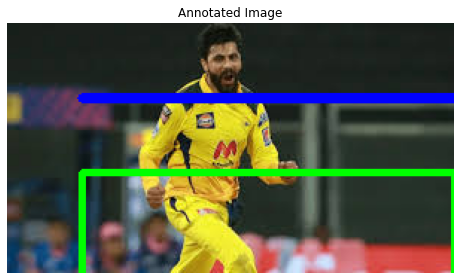

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("jadeja.jpg") 
if image is None:
    print("Error: Image not found!")
    exit()
cv2.line(image, (50, 50), (300, 50), (255, 0, 0), 5)
cv2.rectangle(image, (50, 100), (300, 200), (0, 255, 0), 3)
cv2.circle(image, (200, 300), 50, (0, 0, 255), -1)
cv2.ellipse(image, (250, 400), (100, 50), 0, 0, 180, (255, 255, 0), 2)
cv2.putText(image, "OpenCV Annotation", (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Annotated Image")
plt.show()


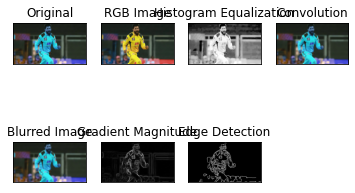

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('jadeja.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)
kernel = np.ones((3, 3), np.float32) / 9 
conv_img = cv2.filter2D(img, -1, kernel)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobel_x, sobel_y)
edges = cv2.Canny(gray, 100, 200)
titles = ['Original', 'RGB Image', 'Histogram Equalization', 'Convolution', 
          'Blurred Image', 'Gradient Magnitude', 'Edge Detection']
images = [img, img_rgb, hist_eq, conv_img, blurred, gradient, edges]
for i in range(7):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], cmap='gray' if i != 1 else None)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


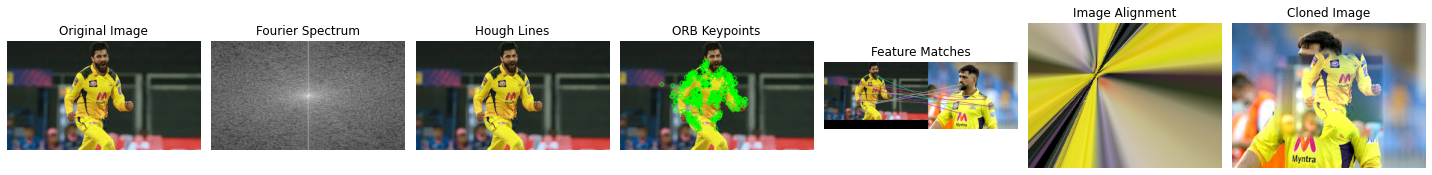

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
image_path1 = r"jadeja.jpg"
image = cv2.imread(image_path1)
if image is None:
    print(f"Error: Image '{image_path1}' not found!")
    exit()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)  
magnitude_spectrum = np.abs(fshift)
log_spectrum = np.log(magnitude_spectrum + 1)  
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
line_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)
orb_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
image_path2 = r"dhoni2.jpg"
image2 = cv2.imread(image_path2)
if image2 is None:
    print(f"Error: Image '{image_path2}' not found!")
    exit()
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors, descriptors2) if descriptors is not None and descriptors2 is not None else []
match_image = None
if matches:
    matches = sorted(matches, key=lambda x: x.distance)
    match_image = cv2.drawMatches(image, keypoints, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
aligned_image = None
if matches:
    src_pts = np.float32([keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if H is not None:
        height, width, _ = image2.shape
        aligned_image = cv2.warpPerspective(image, H, (width, height))
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [np.array([[50, 50], [200, 50], [200, 200], [50, 200]])], (255))
center = (image2.shape[1] // 2, image2.shape[0] // 2)
cloned_image = cv2.seamlessClone(image, image2, mask, center, cv2.NORMAL_CLONE)
titles = ["Original Image", "Fourier Spectrum", "Hough Lines", "ORB Keypoints", "Feature Matches", "Image Alignment", "Cloned Image"]
images = [image, log_spectrum, line_image, orb_image, match_image, aligned_image, cloned_image]
valid_images = [(img, title) for img, title in zip(images, titles) if img is not None]
fig, axs = plt.subplots(1, len(valid_images), figsize=(20, 5))
for ax, (img, title) in zip(axs, valid_images):
    cmap = "gray" if len(img.shape) == 2 else None
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if cmap is None else img, cmap=cmap)
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()


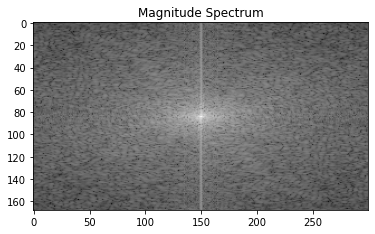

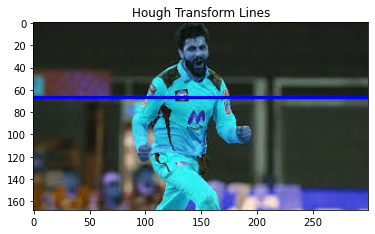

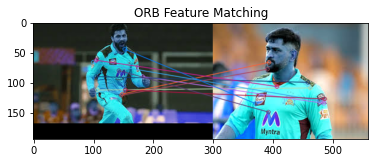

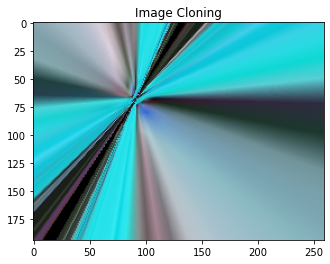

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def perform_fourier_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.show()
def hough_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    plt.imshow(image)
    plt.title("Hough Transform Lines")
    plt.show()
def orb_feature_matching(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    plt.title("ORB Feature Matching")
    plt.show()
def image_cloning(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
    height, width, channels = image2.shape
    im2_warped = cv2.warpPerspective(image1, H, (width, height))
    plt.imshow(im2_warped)
    plt.title("Image Cloning")
    plt.show()
def main():
    image1 = cv2.imread('jadeja.jpg')  
    image2 = cv2.imread('dhoni2.jpg')
    perform_fourier_transform(image1)
    hough_transform(image1.copy())
    orb_feature_matching(image1, image2)
    image_cloning(image1, image2)
if __name__ == "__main__":
    main()


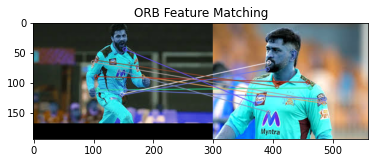

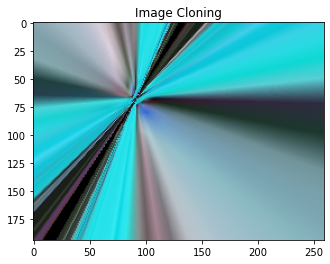

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('jadeja.jpg')  # Replace with your image path
image2 = cv2.imread('dhoni2.jpg')  # Replace with your image path

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Feature matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 10 matches
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.title("ORB Feature Matching")
plt.show()

# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find homography and warp the first image to align with the second image
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
height, width = image2.shape[:2]
image_cloned = cv2.warpPerspective(image1, H, (width, height))

# Show the cloned image
plt.imshow(image_cloned)
plt.title("Image Cloning")
plt.show()
